<font color='green' size=6 align='center'><p style='text-align: center;'>**Análisis y Tratamiento de Datos en Química**\
<font color='green' size=6 align='center'><p style='text-align: center;'>**Cuaderno final 30/08/22**\
<font color='black' size=4 align='center'><p style='text-align: center;'>**Docente: Enrique Mejía**
<font color='black' size=4 align='center'><p style='text-align: center;'>**Estudiante: Christian Quijano - 2182091**

<font color='black' size=4 align='center'><p style='text-align: center;'>**Primera Parte**

In [245]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [246]:
df=pd.read_excel("./Datos/Datos-azul-timol.xlsx")
df.head()

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Espectro UV-Vis,Unnamed: 8
0,Muestra,Absorbancia,Muestra,Absorbancia,Muestra,Absorbancia,[Molar],Longitud de onda,Absorbancia
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,0,400,0.126
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,0.000003,400.5,0.125
3,Blanco,0,Blanco,0,Blanco,-0.001,NaN,401,0.122
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,0.00001,401.5,0.121


In [247]:
df.drop([0],axis=0)
df.set_axis(['', 'Abs1', '', 'Abs2', '', 'Abs3', 'Molar', 'Lo', 'AbsUV'], axis=1, inplace=True)
df.drop([''],axis=1, inplace=True)
df.drop([0],axis=0,inplace=True)
df

,Abs1,Abs2,Abs3,Molar,Lo,AbsUV
1,0.002,0.002,0.002,0,400,0.126
2,0.1,0.09,0.089,0.000003,400.5,0.125
3,0,0,-0.001,NaN,401,0.122
4,0.276,0.267,0.267,0.00001,401.5,0.121
5,-0.001,-0.001,-0.002,NaN,402,0.119
...,...,...,...,...,...,...
797,NaN,NaN,NaN,NaN,798,-0.004
798,NaN,NaN,NaN,NaN,798.5,-0.004
799,NaN,NaN,NaN,NaN,799,-0.004
800,NaN,NaN,NaN,NaN,799.5,-0.004


In [248]:
df1 = pd.concat([df[["Abs1"]],df[["Abs2"]],df[["Abs3"]]], axis=1, ignore_index=True)
df1=df1.dropna()
df1.set_axis(['Abs1', 'Abs2', 'Abs3'], axis=1, inplace=True)
df1['Prom'] = df1[['Abs1', 'Abs2', 'Abs3']].mean(axis=1)
df1_ = df1.drop([2, 4 , 6, 8, 10, 12, 14, 16, 18], axis=0)
AbsB = df1_['Prom'].mean()
print(AbsB)

0.0007777777777777778


In [249]:
df1 = df1.drop([1, 3, 5, 7, 9, 11, 13, 15, 17], axis=0)
df1=df1.append({'Abs1' : 0 , 'Abs2' : 0 , 'Abs3' : 0 , 'Prom' : 0.0007778} , ignore_index=True);

C:\Users\PrimerUsuario\AppData\Local\Temp\ipykernel_6304\661882405.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'Abs1' : 0 , 'Abs2' : 0 , 'Abs3' : 0 , 'Prom' : 0.0007778} , ignore_index=True);


In [250]:
Prom = df1.sort_values('Prom', ignore_index=True)
Prom = Prom[["Prom"]]
Absor=Prom.dropna()
Concen = df[["Molar"]]
Concen=Concen.dropna()
Concen["Concen [mM]"] = Concen["Molar"]/0.001
Concen = Concen.reset_index(drop=True)

In [251]:
df2 = pd.concat([Absor ,Concen[["Concen [mM]"]]], axis=1, ignore_index=True)
df2.set_axis(['Abs', '[mM]'], axis=1, inplace=True)
df2

,Abs,[mM]
0,0.000778,0.0
1,0.093000,0.003475
2,0.270000,0.010425
3,0.483000,0.017375
4,0.664333,0.024325
5,0.877000,0.031275
6,1.040667,0.038225
7,1.266667,0.045175
8,1.478000,0.052125
9,1.657333,0.059075


In [252]:
import sklearn.metrics as skm
from sklearn import linear_model
x=df2[['[mM]']] 
y=df2[['Abs']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y_pred)
r2=skm.r2_score(y, y_pred)

In [253]:
x=np.array(x)
y=np.array(y)
y_pred=np.array(y_pred)

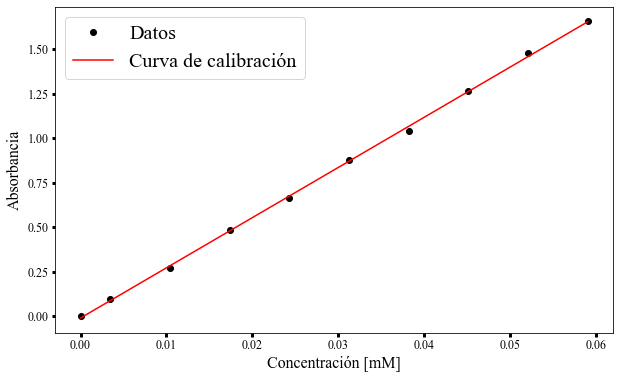

In [254]:
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams["font.family"] = 'Times New Roman'
plt.plot(df2['[mM]'],df2['Abs'], 'o', color='black', label='Datos')
plt.plot(x,y_pred, 'r-', label='Curva de calibración')
#ax.set_xlim(400, 4000)
ax.tick_params(axis='both', labelsize=12, width=3)
ax.set_xlabel('Concentración [mM]',  fontsize=16)
ax.set_ylabel('Absorbancia', fontsize=16)
plt.legend(loc='best', fontsize=20)
plt.show();

In [255]:
df1.drop('Prom', inplace=True, axis=1)

In [256]:
df1['Std'] = df1[["Abs1","Abs2","Abs3"]].std(axis= 1)
e=df1[["Std"]]
e = e*3
e=np.array(e)

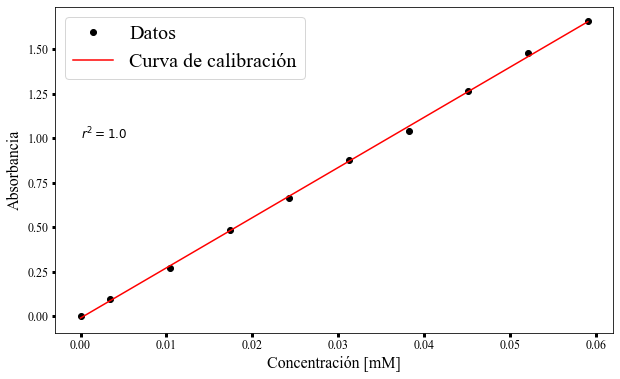

In [257]:
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams["font.family"] = 'Times New Roman'
plt.plot(x,y, 'o', color='black', label='Datos')
plt.plot(x,y_pred, 'r-', label='Curva de calibración')
#plt.errorbar(x, y_pred, yerr=e)
#ax.set_xlim(400, 4000)
ax.tick_params(axis='both', labelsize=12, width=3)
ax.set_xlabel('Concentración [mM]',  fontsize=16)
ax.set_ylabel('Absorbancia', fontsize=16)
plt.legend(loc='best', fontsize=20)
ax.text(0,1, r"$r^2 = "+str(round(r2, 2))+r"$", fontsize=12, color="black")
plt.show();

In [258]:
#Profesor, que pena, pero el plt.errorbar intenté pero no sé el error exactamente pero no realiza
#el yerror en la gráfica.

<font color='black' size=4 align='center'><p style='text-align: center;'>**Segunda Parte**

In [259]:
ir=pd.read_excel("./Datos/ASCI_IR.xlsx", header=None)

In [260]:
prop=pd.read_excel("./Datos/Informacion Crudos20.xlsx", header=None)
prop.set_axis(['', '', '', '', 'ASCI', 'IN(ASCI)', '', '', '', '', '', ''], axis=1, inplace=True)
prop.drop([''],axis=1, inplace=True)
prop.drop([0],axis=0,inplace=True)
prop = prop.reset_index(drop=True)
prop1 = prop[["ASCI"]]
prop2 = prop[["IN(ASCI)"]]
ir =  ir.T

In [261]:
data_signals= np.array(ir)
data_prop1 = np.array(prop1)
data_prop2 = np.array(prop2)

In [262]:
data_signals.shape, data_prop1.shape, data_prop2.shape

((81, 7468), (81, 1), (81, 1))

In [263]:
#normalizamos los datos
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(data_signals) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(data_signals)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(data_signals, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

<font color='black' size=4 align='center'><p style='text-align: left;'>**Primera propiedad: ASCI**

MSE = 6.17


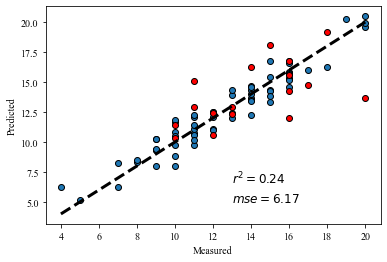

In [264]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop1, train_size=0.8, random_state=22, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(13,5, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(13,6.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)));

In [265]:
def optimise_pls(X, y, xt, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [266]:
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_rs = np.arange(1, 101)
for n_rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop1, train_size=0.8, random_state=n_rs, shuffle= True)
    
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, 10)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

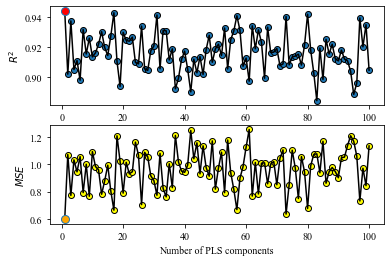

In [267]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#fig, ax = plt.subplots()
ax1.scatter(arr_rs, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_rs, r2s, 'k-')
ax1.plot(arr_rs[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_rs, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_rs, mses, 'k-')
ax2.plot(arr_rs[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [268]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=20) # Vamos hacer 10 separaciones sin barajar en cada separación
model=PLSRegression(n_components=10) # Utilizamos 60 componentes de ajuste del modelo con PLS
x_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
x_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = data_prop1[train_index]
    y_test = data_prop1[test_index]
    model.fit(x_train, y_train) #Training the model
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    # Almacenamos cada grupo en los arreglos creados
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    # Entrenamos el modelo para cada separación the model
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 7.937813603475878
R2. 1 on the test set: 0.40352882698790205
MSE. 2 on the test set: 4.455059330373603
R2. 2 on the test set: 0.63257242636094
MSE. 3 on the test set: 4.324336981103252
R2. 3 on the test set: 0.633797463723972
MSE. 4 on the test set: 12.34560290271415
R2. 4 on the test set: -0.5312375693288869
MSE. 5 on the test set: 14.641477200733874
R2. 5 on the test set: -0.22171387333372605


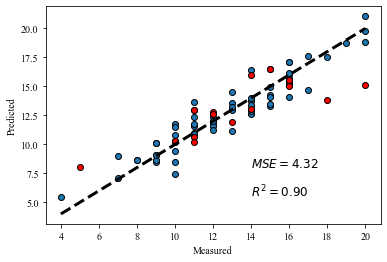

In [269]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[r2s.index(max(r2s))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[r2s.index(max(r2s))]) # presente el menor valor del mse
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicmos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(14,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(14,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<font color='black' size=4 align='center'><p style='text-align: left;'>**Segunda propiedad: IN(ASCI)**

MSE = 154.37


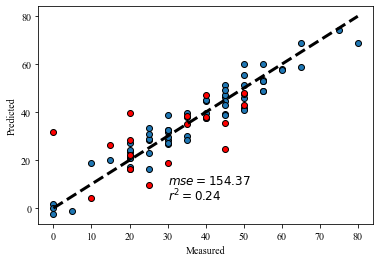

In [270]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop2, train_size=0.8, random_state=22, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,10, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,3, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)));

In [271]:
def optimise_pls(X, y, xt, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [272]:
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_rs = np.arange(1, 101)
for n_rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop2, train_size=0.8, random_state=n_rs, shuffle= True)
    
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, 10)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

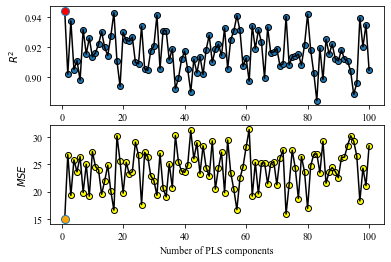

In [273]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#fig, ax = plt.subplots()
ax1.scatter(arr_rs, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_rs, r2s, 'k-')
ax1.plot(arr_rs[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_rs, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_rs, mses, 'k-')
ax2.plot(arr_rs[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [275]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=1) # Vamos hacer 10 separaciones sin barajar en cada separación
model=PLSRegression(n_components=10) # Utilizamos 60 componentes de ajuste del modelo con PLS
x_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
x_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = data_prop2[train_index]
    y_test = data_prop2[test_index]
    model.fit(x_train, y_train) #Training the model
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    # Almacenamos cada grupo en los arreglos creados
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    # Entrenamos el modelo para cada separación the model
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 296.0132706173291
R2. 1 on the test set: 0.21443677494574742
MSE. 2 on the test set: 188.59656028074056
R2. 2 on the test set: 0.340427330165716
MSE. 3 on the test set: 116.01664213404341
R2. 3 on the test set: 0.5767686442990365
MSE. 4 on the test set: 277.3043554699924
R2. 4 on the test set: 0.0895810836765879
MSE. 5 on the test set: 102.92538558320831
R2. 5 on the test set: 0.4706399053882204


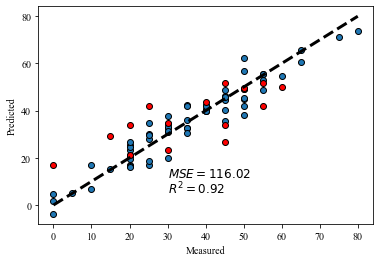

In [280]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[r2s.index(max(r2s))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[r2s.index(max(r2s))]) # presente el menor valor del mse
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicmos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(30,12, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(30,5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()